## Esame Metodi Numerici  4 Luglio 2024 - Turno I Ore 9

# Esercizio 1

Si consideri il sistema lineare:

     A  x = b 

dove A è la matrice dei coefficienti, b è il termine noto, ed x è il vettore delle incognite da determinare.
I dati di questo sistema lineare sono contenuti nel file **testI.mat**.

- Si implementino e si testino sui dati forniti due metodi che sono adatti a risolvere tale sistema lineare con le caratteristiche delle matrici dei coefficienti date in input.
                                      **[punti 7]**
- Si confrontino i risultati ottenuti e si giustifichino utilizzando  e richiamando gli aspetti teorici dei metodi implementati.
                                      **[punti 2]**

Per la lettura dei dati procedere nel seguente modo:

``from scipy.io import loadmat``

``import numpy as np``

``dati = loadmat('testI')``

``A=dati["A"] ``

``A=A.astype(float)``

`` b=dati["b"] ``

`` b=b.astype(float)``

(False, False)
Raggio spettrale jacobi: 0.4820926155362989
raggio spettrale Gauss-Seidel  0.2889737780164911


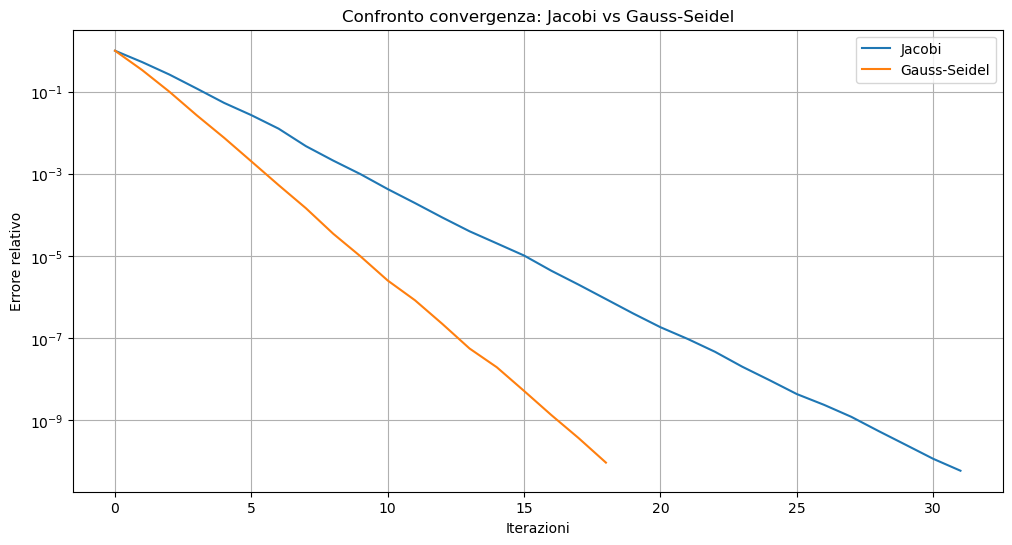

In [36]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt

dati = loadmat('testI')
A = dati["A"].astype(float)
b = dati["b"].astype(float).flatten()

def check(A):
    is_sym = np.allclose(A, A.T)
    is_pos = is_sym and np.all(np.linalg.eigvals(A) > 0)
    return is_sym, is_pos

print(check(A))


def jacobi(A, b, x0, tol=1e-10, max_it=2000):
    d = np.diag(A)  
    n = A.shape[0]
    invM = np.diag(1/d)
    L = np.tril(A, -1)       
    U = np.triu(A, 1)      
    N = L + U
    T = -invM @ N
    autovalori = np.linalg.eigvals(T)
    raggio = max(abs(autovalori))
    print("Raggio spettrale jacobi:", raggio)
    
    er_vet = []
    for i in range(max_it):
        x = invM @ (b - N @ x0)
        error = np.linalg.norm(x - x0) / np.linalg.norm(x)
        er_vet.append(error)
        
        if error < tol:
            return x, i+1, er_vet
        x0 = x.copy()
    
    return x, max_it, er_vet


def gauss_seidel(A, b, x0, tol=1e-10, max_it=2000):
    n = A.shape[0]
    D = np.diag(np.diag(A))
    E = np.tril(A, -1)
    F = np.triu(A, 1)

    M = D + E
    N = -F

    T = np.linalg.inv(M) @ N
    autovalori=np.linalg.eigvals(T)
    raggiospettrale = np.max(np.abs(autovalori))
    print("raggio spettrale Gauss-Seidel ",raggiospettrale)
    er_vet = []
    
    for i in range(max_it):
        temp = b - F @ x0
        x = np.linalg.solve(M, temp)
        error = np.linalg.norm(x - x0) / np.linalg.norm(x)
        er_vet.append(error)
        if error < tol:
            return x, i+1, er_vet
        x0 = x.copy()

    return x, max_it, er_vet


n = A.shape[0]
x0_curr = np.zeros(n)
sol, iterazioni, errori = jacobi(A, b, x0_curr)
sol1, iterazioni1, errori1 = gauss_seidel(A, b, x0_curr)

plt.figure(figsize=(12,6))
plt.semilogy(errori, label='Jacobi', markersize=3)
plt.semilogy(errori1, label='Gauss-Seidel', markersize=3)
plt.xlabel('Iterazioni')
plt.ylabel('Errore relativo')
plt.title('Confronto convergenza: Jacobi vs Gauss-Seidel')
plt.legend()
plt.grid(True)
plt.show()

- Data la matrice
$$
\left[
\begin{array}{cccc}
3.0 &2.0 & 1.0 & -1.0\\
4.0 & 6.0 & 3.0 & 2.0\\
2.0 & 1.0 & 4.0 & 3.0\\
1.0 & 4.0 & 2.0 & 7.0
\end{array}
\right ],
$$
calcolarne la fattorizzazione lu di Gauss  facendo uso della funzione scipy.linalg.lu e:
- sfruttarla per il calcolo del suo determinante (confrontare l'esattezza del calcolo con quello ottenuto usando la funzione numpy.linalg.det)             **[punti: 2]**
- sfruttarla per il calcolo della sua inversa risolvendo n sistemi lineari (confrontare l'inversa con quella ottenuta usando la funzione numpy.linalg.inv)
                                                                                                    **[punti: 2]**

In [44]:
import numpy as np
from scipy.linalg import lu, solve_triangular

# Matrice
A = np.array([[3.0, 2.0, 1.0, -1.0],
              [4.0, 6.0, 3.0, 2.0], 
              [2.0, 1.0, 4.0, 3.0],
              [1.0, 4.0, 2.0, 7.0]])

P, L, U = lu(A)

det_lu = np.linalg.det(P) * np.prod(np.diag(U))
det_numpy = np.linalg.det(A)
print(f"det(A) LU: {det_lu}")
print(f"det(A) numpy: {det_numpy}")
print(f"Differenza: {abs(det_lu - det_numpy)}")
print() 
n = A.shape[0]
A_inv = np.zeros((n, n))
for i in range(n):
    ei = np.zeros(n); ei[i] = 1
    y = solve_triangular(L, P @ ei, lower=True)
    A_inv[:, i] = solve_triangular(U, y, lower=False)
A_inv_numpy = np.linalg.inv(A)

print(f"Differenza inverse: {np.max(np.abs(A_inv - A_inv_numpy))}")
print("Inversa via LU:")
print(A_inv)

det(A) LU: 140.0
det(A) numpy: 140.00000000000006
Differenza: 5.684341886080802e-14

Differenza inverse: 0.0
Inversa via LU:
[[ 0.85       -0.45        0.          0.25      ]
 [-0.39285714  0.39285714 -0.14285714 -0.10714286]
 [-0.51428571  0.31428571  0.28571429 -0.28571429]
 [ 0.25       -0.25        0.          0.25      ]]


## Esercizio 2

-  Implementare il  metodo di Newton Raphson, la variante delle corde e la variante di Shamanskii per la soluzione di un sistema non lineare
                           [**punti: 7**]

- Risolvere il sistema di equazioni non lineare 

$$
\left\{
\begin{array}{c}
x_0\cdot x_1+x_0=1 \\
 x_0^2+x_1^2=9
\end{array}
\right.
$$
con ciascuno dei tre metodi e confrontare per ciascun metodo il grafico dell'errore relativo tra due iterati successivi, giustificando i risultati alla luce della teoria. [**punti: 3**]

 **Nota Bene**: Servirsi del metodo grafico per individuare un 
iterato iniziale  $X^{(0)}$ nell'intorno della soluzione che si vuole approssimare.  Per fare cio',  visualizzare le 
curve di livello corrisponenti a z=0 delle due superfici $z_1 = f_1 (x_0 ,x_1 )$ e $z_2 = f_2(x_0 , x_1 )$ e 
definire come iterato iniziale un vettore $X^{(0)}=(x_0^{(0)},x_1^{(0)})$ oppurtuno le cui componenti appartengono ad un 
intorno della soluzione (cioè  dei punti di  intersezione tra le curve di livello delle due superfici) \]

- Descrivere teoricamente la variante del Metodo di Newton-Raphson per calcolare il minimo di una funzione non lineare in più variabili.

 [**punti: 2**]
 



RISULTATI:
Newton-Raphson: [0.25065734 2.98951014], iterazioni: 5
Corde: [0.25065734 2.98951014], iterazioni: 28
Shamanskii: [0.25065734 2.98951014], iterazioni: 7


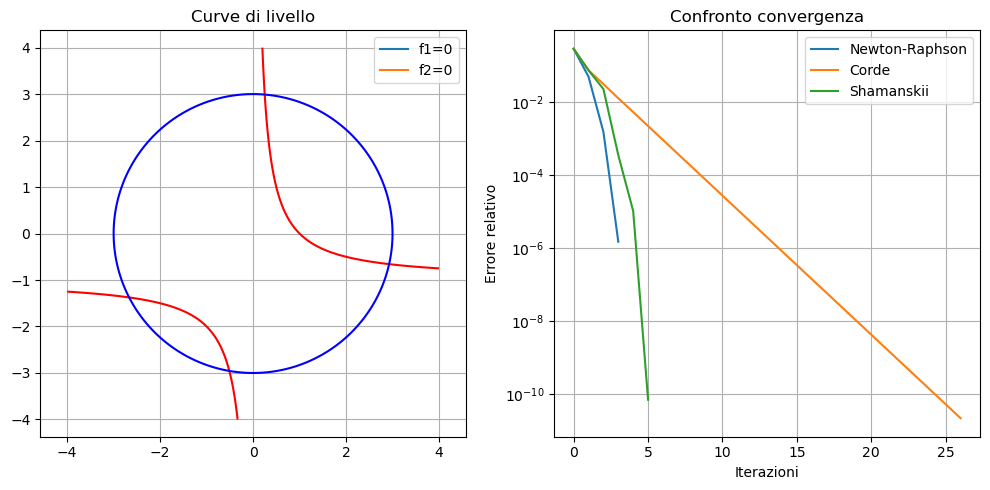


VERIFICA:
f(sol_NR) = [-9.41824396e-12  1.99591454e-11]
f(sol_chord) = [-4.61257699e-11  8.29949443e-11]
f(sol_sham) = [ 6.43929354e-15 -1.42108547e-14]


In [6]:
import numpy as np
import matplotlib.pyplot as plt

# SISTEMA NON LINEARE
def f(x):
    return np.array([x[0]*x[1] + x[0] - 1, x[0]**2 + x[1]**2 - 9])

def jacobian(x):
    return np.array([[x[1] + 1, x[0]], [2*x[0], 2*x[1]]])

# 1. NEWTON-RAPHSON
def newton_raphson(x0, tol=1e-10, max_it=50):
    x = x0.copy()
    errors = []
    for i in range(max_it):
        fx = f(x)
        if np.linalg.norm(fx) < tol:
            break
        J = jacobian(x)
        delta = np.linalg.solve(J, -fx)
        x_new = x + delta
        if np.linalg.norm(x_new) > 0:
            error = np.linalg.norm(x_new - x) / np.linalg.norm(x_new)
            errors.append(error)
        x = x_new
    return x, i+1, errors

# 2. METODO DELLE CORDE
def chord_method(x0, tol=1e-10, max_it=50):
    x = x0.copy()
    J0 = jacobian(x0)  # Jacobiano fisso
    errors = []
    for i in range(max_it):
        fx = f(x)
        if np.linalg.norm(fx) < tol:
            break
        delta = np.linalg.solve(J0, -fx)
        x_new = x + delta
        if np.linalg.norm(x_new) > 0:
            error = np.linalg.norm(x_new - x) / np.linalg.norm(x_new)
            errors.append(error)
        x = x_new
    return x, i+1, errors

# 3. METODO DI SHAMANSKII
def shamanskii(x0, m=2, tol=1e-10, max_it=50):
    x = x0.copy()
    errors = []
    for i in range(max_it):
        fx = f(x)
        if np.linalg.norm(fx) < tol:
            break
        
        # Calcola Jacobiano ogni m iterazioni
        if i % m == 0:
            J = jacobian(x)
        
        delta = np.linalg.solve(J, -fx)
        x_new = x + delta
        if np.linalg.norm(x_new) > 0:
            error = np.linalg.norm(x_new - x) / np.linalg.norm(x_new)
            errors.append(error)
        x = x_new
    return x, i+1, errors

# VISUALIZZAZIONE GRAFICA PER TROVARE X0
x = np.linspace(-4, 4, 400)
y = np.linspace(-4, 4, 400)
X, Y = np.meshgrid(x, y)

# Curve di livello z=0
Z1 = X*Y + X - 1  # f1(x,y) = 0
Z2 = X**2 + Y**2 - 9  # f2(x,y) = 0

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
c1 = plt.contour(X, Y, Z1, levels=[0], colors='red')
c2 = plt.contour(X, Y, Z2, levels=[0], colors='blue')
plt.plot([], [], label='f1=0')
plt.plot([], [], label='f2=0')
plt.grid(True)
plt.axis('equal')
plt.title('Curve di livello')
plt.legend()

# PUNTO INIZIALE (scelto graficamente)
x0 = np.array([1.0, 2.8])
plt.plot(x0[0], x0[1], label='x0')

# RISOLUZIONE CON I TRE METODI
sol_nr, it_nr, err_nr = newton_raphson(x0)
sol_chord, it_chord, err_chord = chord_method(x0)
sol_sham, it_sham, err_sham = shamanskii(x0)

print("RISULTATI:")
print(f"Newton-Raphson: {sol_nr}, iterazioni: {it_nr}")
print(f"Corde: {sol_chord}, iterazioni: {it_chord}")
print(f"Shamanskii: {sol_sham}, iterazioni: {it_sham}")

# CONFRONTO ERRORI
plt.subplot(1, 2, 2)
plt.semilogy(err_nr, label='Newton-Raphson')
plt.semilogy(err_chord, label='Corde')
plt.semilogy(err_sham, label='Shamanskii')
plt.xlabel('Iterazioni')
plt.ylabel('Errore relativo')
plt.title('Confronto convergenza')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# VERIFICA SOLUZIONI
print("\nVERIFICA:")
print(f"f(sol_NR) = {f(sol_nr)}")
print(f"f(sol_chord) = {f(sol_chord)}")
print(f"f(sol_sham) = {f(sol_sham)}")


## Domande Intelligenza Artificiale
**NB: Ogni risposta esatta:  +0.5 punti, ogni risposta errata: -0.5 punti. La mancanza di risposta:  0 punti**

Domande a risposta multipla

**1.** Quali sono i passaggi fondamentali all’interno del paradigma generale dell’Intelligenza Artificiale?

•	Acquisizione dati, Data Processing, Addestramento del modello, Predizione e metriche

•	Data Processing, Addestramento del Modello, Predizione, Analisi economica dei risultati

•	Acquisizione dati, Data Processing, Addestramento del modello, Predizione, Test di Turing

•	Acquisizione dati, Addestramento del Modello, Test di Turing, Predizione


**2.** Per una rete neurale, l’apprendimento è legato a:

•	Minimizzare la funzione obiettivo

•	Minimizzare la funzione di attivazione

•	Massimizzare il valore dei pesi tramite l’algoritmo di back-propagation

•	Massimizzare il valore della funzione di training


**3.**  Il Test di Turing serve a:

•	Valutare se una macchina dimostra un comportamento intelligente

•	Valutare il carico computazionale di un algoritmo di Intelligenza Artificiale

•	Valutare la velocità di risposta di un algoritmo di Intelligenza Artificiale

•	Valutare se una macchina dimostra un comportamento predicibile


**4.**
Le ultime e più recenti innovazioni nel campo dell’Intelligenza Artificiale sono:

•	CNN, GAN e Transformers

•	Expert Systems, CNN e GAN

•	Expert Systems, Deep Learning e CNN

•	CNN, Expert Systems e Transformers


**5.** A cosa serve il validation set?

•	A trovare i migliori iperparametri del modello

•	Ad addestrare il modello 

•	A testare il modello

•	A trovare le etichette dei dati di input


**Domande aperte**

Quale è il ruolo del learning rate nella formula di aggiornamento dei pesi mediante gradient descent. Aggiornamento del learning rate programmato (learning rate scheduling) : step decay, decadimento esponenziale, decadimento dipendente dal tempo. **[punti 2]**


Learning rate adattivo per ogni peso (durante il processo di ottimizzazione) : Adagrad, RMSProp, Adadelta, Adam. (formula di aggiornamento dei pesi e discussioni)
**[punti 2.5]**